In [58]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

In [ ]:
malaria = pd.read_csv("../data/malaria_raw.csv")

In [6]:
malaria.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Period,Year,Month,County,Code,Cases(<5 yrs),Cases(>5 yrs),Total Cases,Temp(C),Rainfall(mm),month_code,county_code
0,0,0,0,Jan-22,2022,Jan,Baringo,KE_County_30,663,1975,2638,18,96.54,1,30
1,1,1,1,Feb-22,2022,Feb,Baringo,KE_County_30,805,1759,2564,19,45.28,2,30
2,2,2,2,Mar-22,2022,Mar,Baringo,KE_County_30,762,1370,2132,20,77.64,3,30
3,3,3,3,Apr-22,2022,Apr,Baringo,KE_County_30,597,1146,1743,19,261.67,4,30
4,4,4,4,May-22,2022,May,Baringo,KE_County_30,725,1700,2425,17,169.35,5,30


In [7]:
malaria['Date'] = pd.to_datetime(malaria['Period'], format='%b-%y')

malaria.sort_values('Date', inplace=True)

TOTAL MALARIA CASES IN KENYA OVER THE YEARS

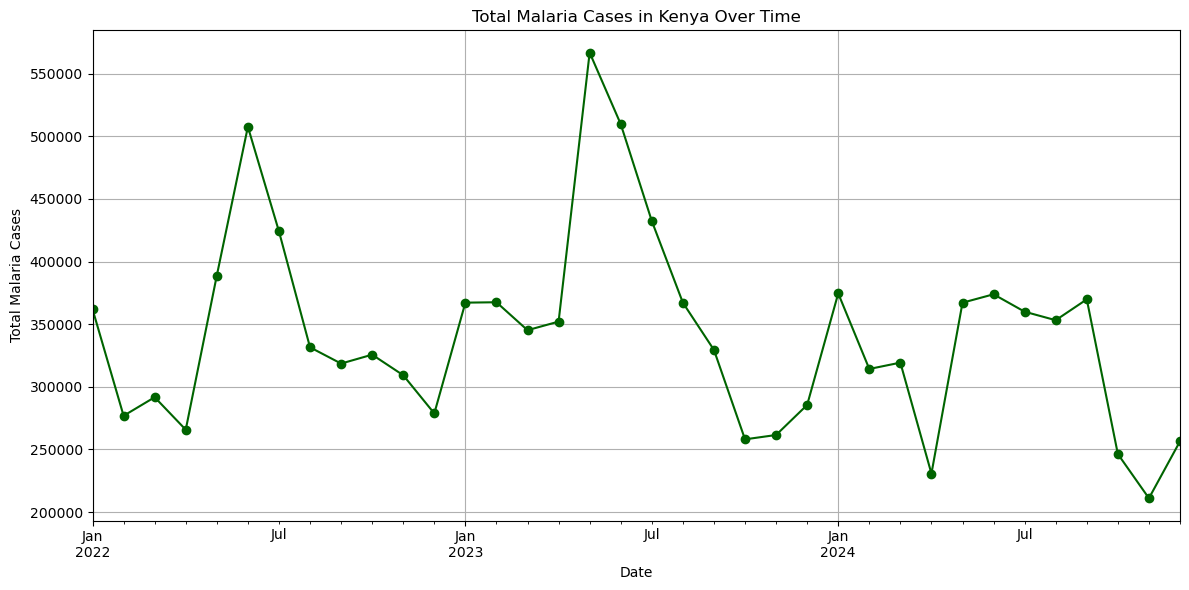

In [8]:
monthly_total = malaria.groupby('Date')['Total Cases'].sum()

plt.figure(figsize=(12,6))
monthly_total.plot(marker='o', color='darkgreen')
plt.title('Total Malaria Cases in Kenya Over Time')
plt.xlabel('Date')
plt.ylabel('Total Malaria Cases')
plt.grid(True)
plt.tight_layout()
plt.show()


YEARLY SUMMARY BY AGE GROUP

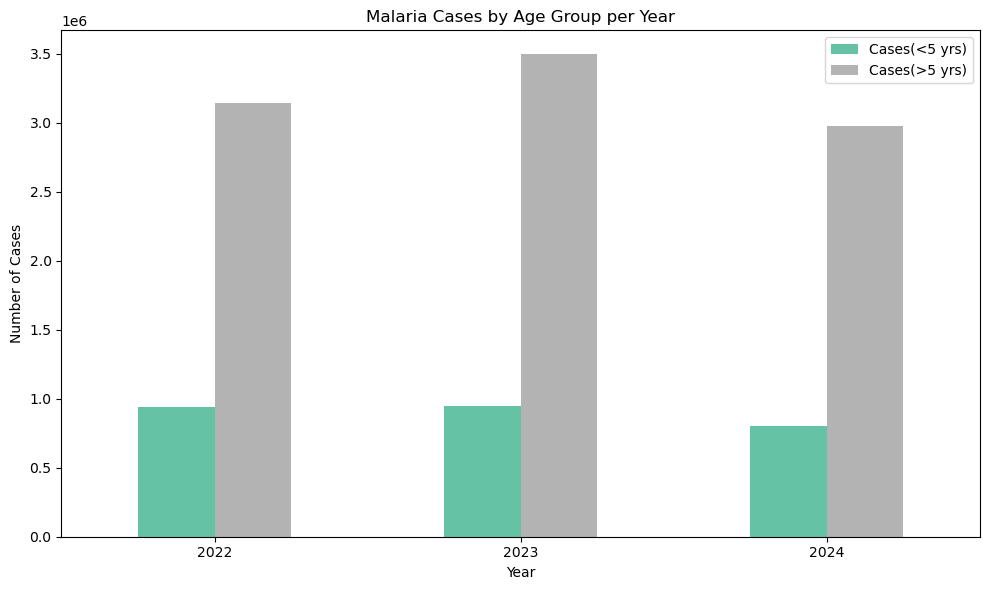

In [9]:
yearly_summary = malaria.groupby('Year')[['Cases(<5 yrs)', 'Cases(>5 yrs)']].sum()

yearly_summary.plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title('Malaria Cases by Age Group per Year')
plt.ylabel('Number of Cases')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


TOP 10 COUNTY ANALYSIS

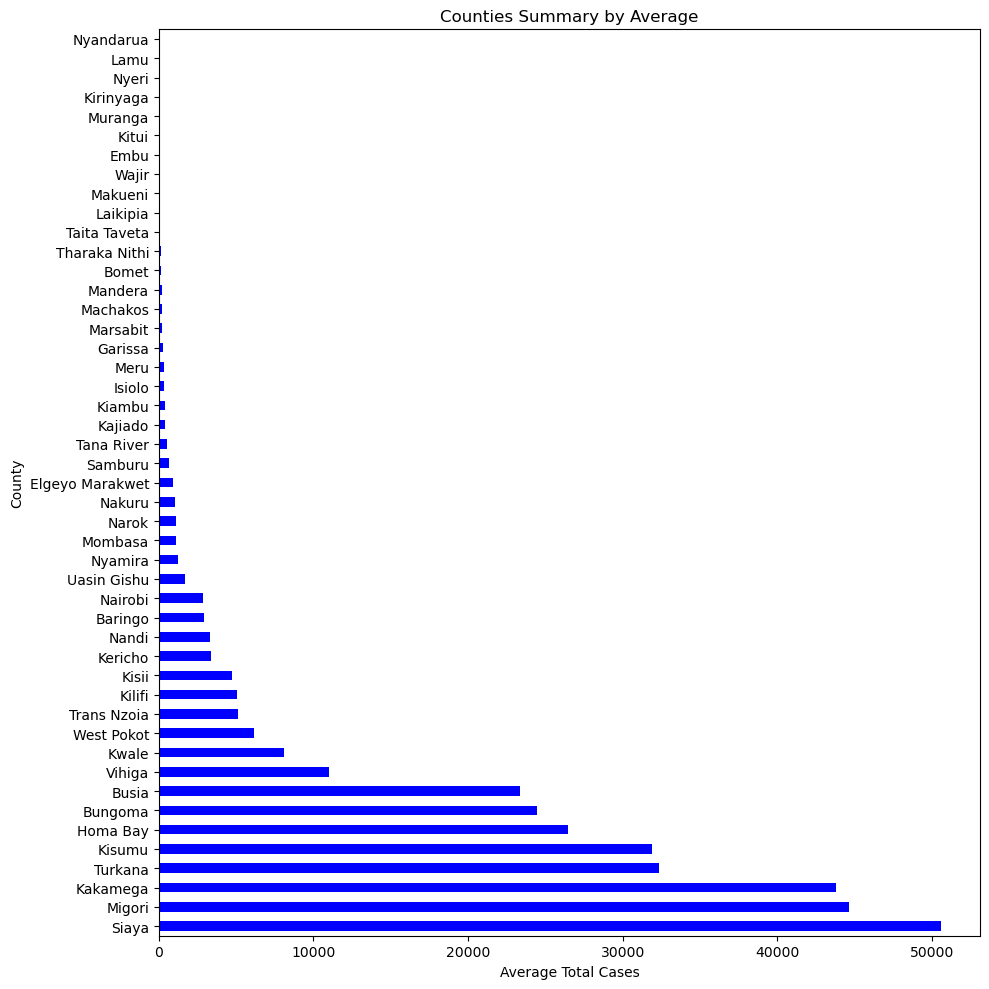

In [15]:
top_counties = malaria.groupby('County')['Total Cases'].mean().sort_values(ascending=False)

top_counties.plot(kind='barh', figsize=(10,10), color='blue')
plt.title('Counties Summary by Average')
plt.xlabel('Average Total Cases')
plt.tight_layout()
plt.show()


MONTHLY TRENDS

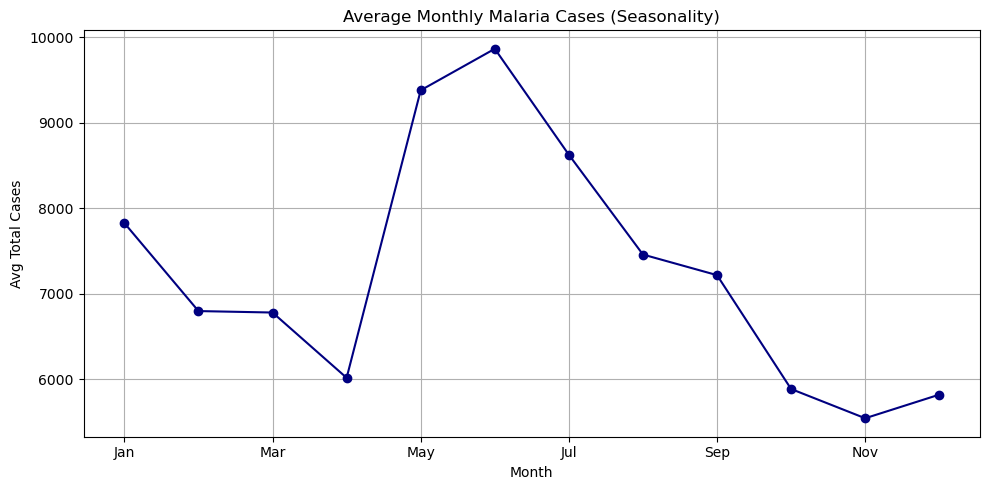

In [21]:
monthly_avg = malaria.groupby('Month')['Total Cases'].mean().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.figure(figsize=(10,5))
monthly_avg.plot(marker='o', linestyle='-', color='navy')
plt.title('Average Monthly Malaria Cases (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Avg Total Cases')
plt.grid(True)
plt.tight_layout()
plt.show()


TOP COUNTY TREND (SIAYA)

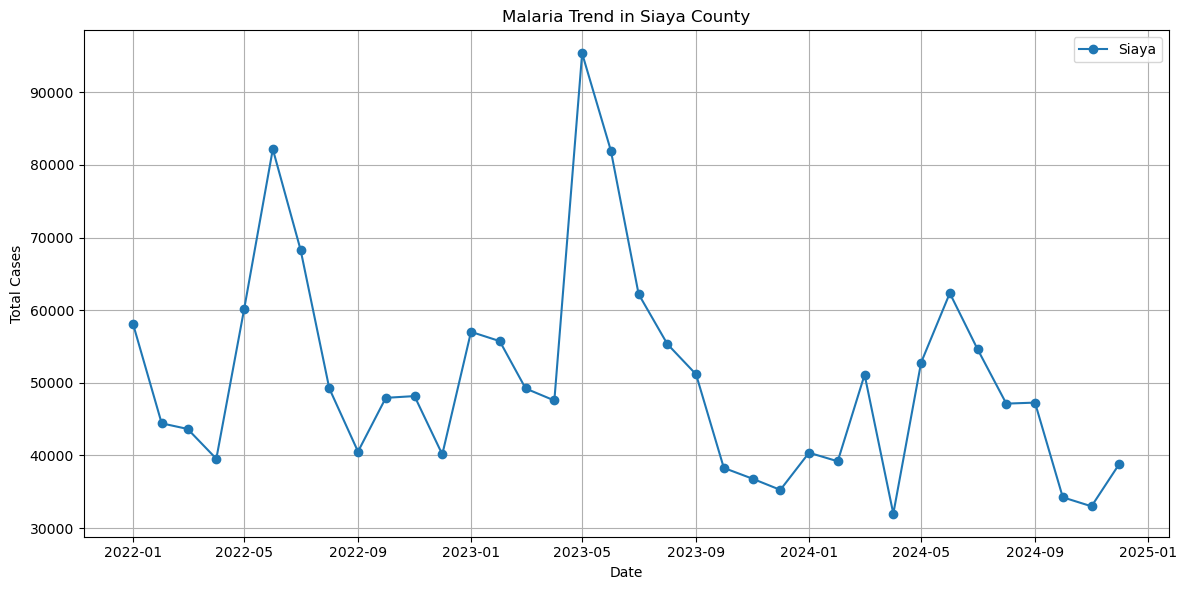

In [22]:
county_name = 'Siaya'
kisumu_data = malaria[malaria['County'] == county_name]

plt.figure(figsize=(12,6))
plt.plot(kisumu_data['Date'], kisumu_data['Total Cases'], marker='o', label=county_name)
plt.title(f'Malaria Trend in {county_name} County')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


CLIMATE TREND (SIAYA)

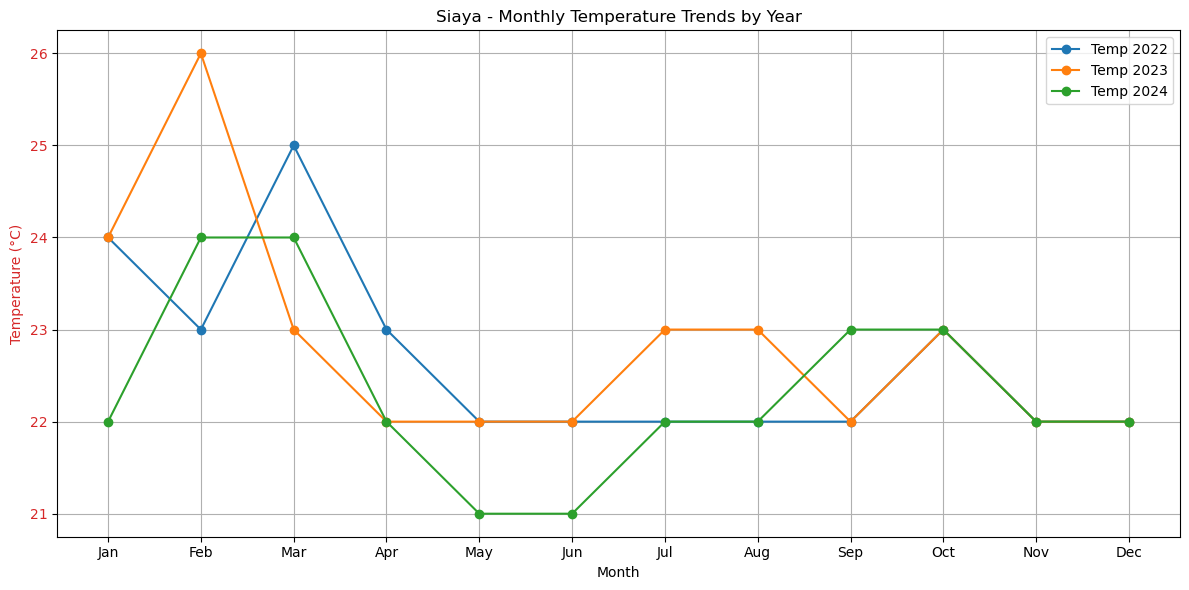

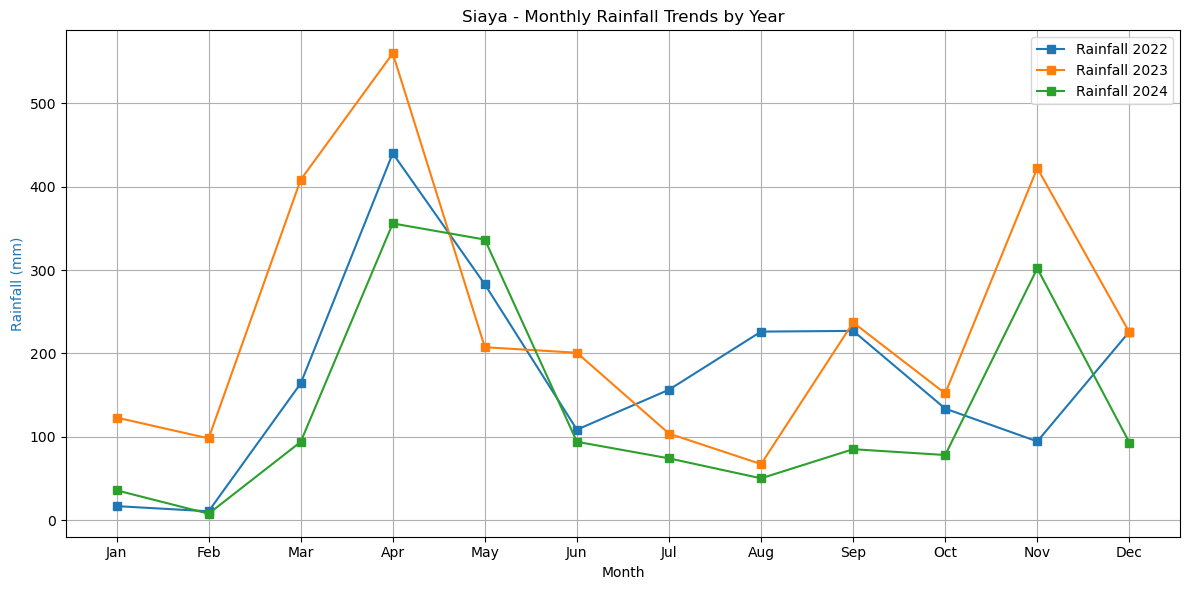

In [29]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
malaria['Month'] = pd.Categorical(malaria['Month'], categories=month_order, ordered=True)

malaria.sort_values(by=['Year', 'Month'], inplace=True)

target_county = 'Siaya'  

county_df = malaria[malaria['County'] == target_county]

years = county_df['Year'].unique()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Temperature
for year in years:
    subset = county_df[county_df['Year'] == year]
    ax1.plot(subset['Month'], subset['Temp(C)'], marker='o', label=f'Temp {year}')
ax1.set_ylabel('Temperature (°C)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_xlabel('Month')
ax1.set_title(f'{target_county} - Monthly Temperature Trends by Year')
ax1.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Rainfall 
fig, ax2 = plt.subplots(figsize=(12, 6))
for year in years:
    subset = county_df[county_df['Year'] == year]
    ax2.plot(subset['Month'], subset['Rainfall(mm)'], marker='s', label=f'Rainfall {year}')
ax2.set_ylabel('Rainfall (mm)', color='tab:blue')
ax2.set_xlabel('Month')
ax2.set_title(f'{target_county} - Monthly Rainfall Trends by Year')
ax2.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

LEAST CASES COUNT COUNTY TREND (NYANDARUA)

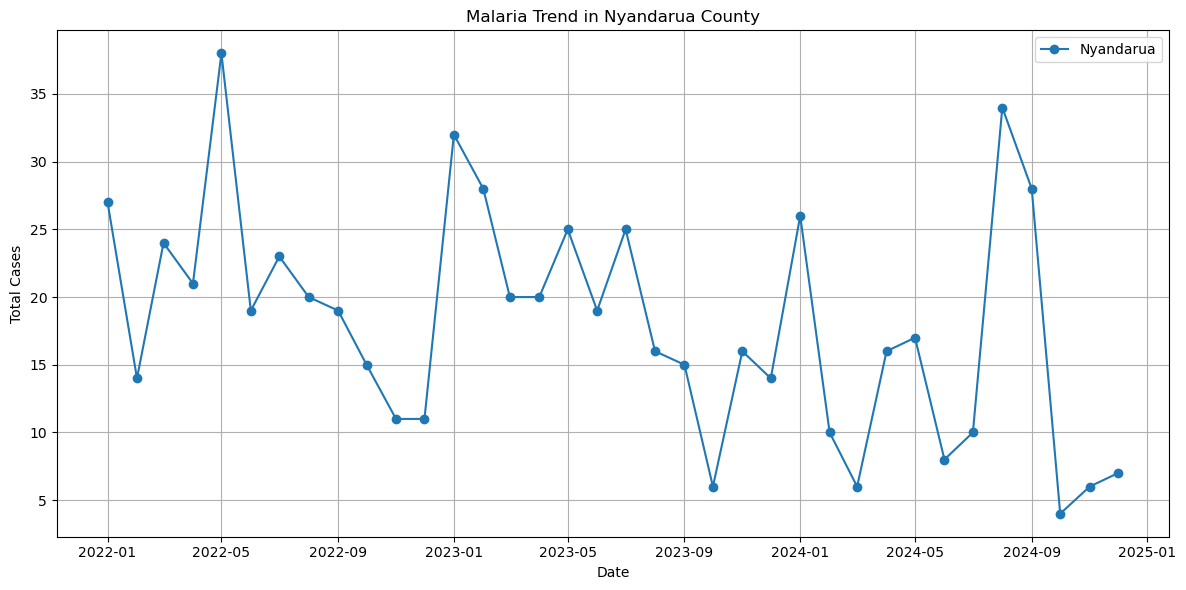

In [23]:
county_name = 'Nyandarua'
kisumu_data = malaria[malaria['County'] == county_name]

plt.figure(figsize=(12,6))
plt.plot(kisumu_data['Date'], kisumu_data['Total Cases'], marker='o', label=county_name)
plt.title(f'Malaria Trend in {county_name} County')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


CLIMATE TREND(NYANDARUA)

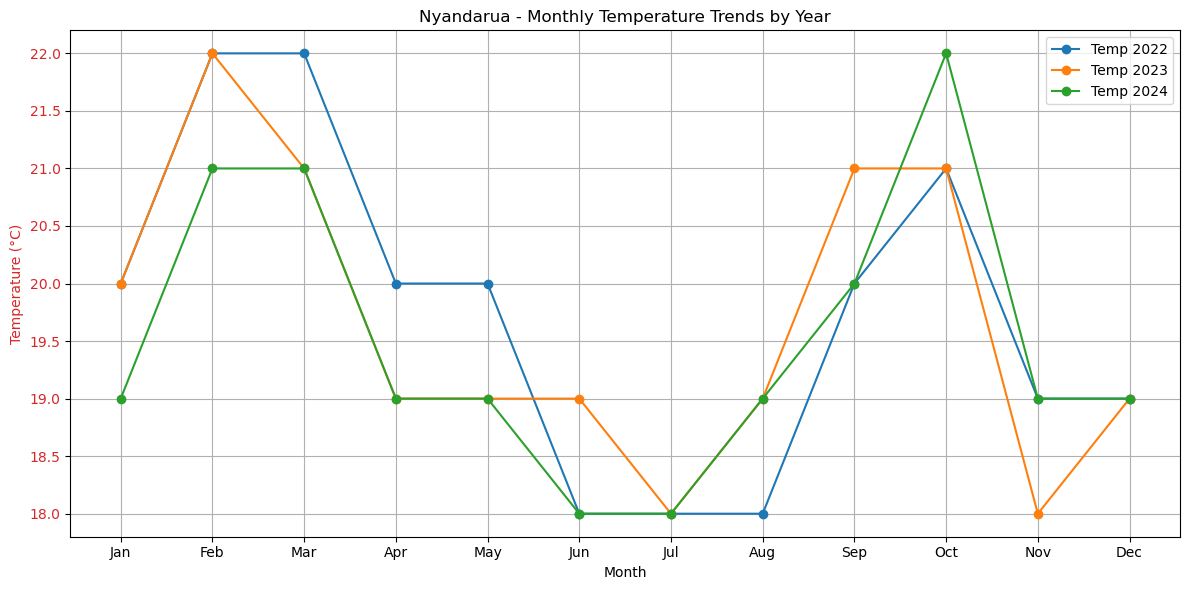

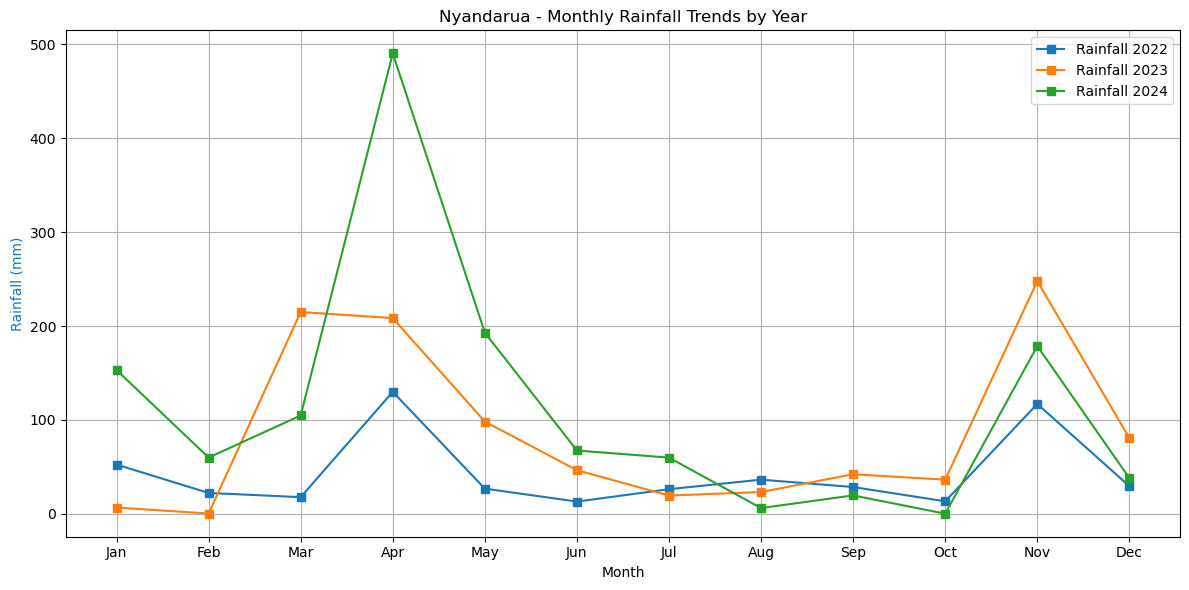

In [28]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
malaria['Month'] = pd.Categorical(malaria['Month'], categories=month_order, ordered=True)

malaria.sort_values(by=['Year', 'Month'], inplace=True)

target_county = 'Nyandarua'  

county_df = malaria[malaria['County'] == target_county]

years = county_df['Year'].unique()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Temperature
for year in years:
    subset = county_df[county_df['Year'] == year]
    ax1.plot(subset['Month'], subset['Temp(C)'], marker='o', label=f'Temp {year}')
ax1.set_ylabel('Temperature (°C)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_xlabel('Month')
ax1.set_title(f'{target_county} - Monthly Temperature Trends by Year')
ax1.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Rainfall 
fig, ax2 = plt.subplots(figsize=(12, 6))
for year in years:
    subset = county_df[county_df['Year'] == year]
    ax2.plot(subset['Month'], subset['Rainfall(mm)'], marker='s', label=f'Rainfall {year}')
ax2.set_ylabel('Rainfall (mm)', color='tab:blue')
ax2.set_xlabel('Month')
ax2.set_title(f'{target_county} - Monthly Rainfall Trends by Year')
ax2.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

TOTAL CASES PER MONTH (YEAR AFTER YEAR)

C:\Users\user\AppData\Local\Temp\ipykernel_15404\1868150684.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_cases = malaria.groupby(['Year', 'Month'])['Total Cases'].sum().reset_index()


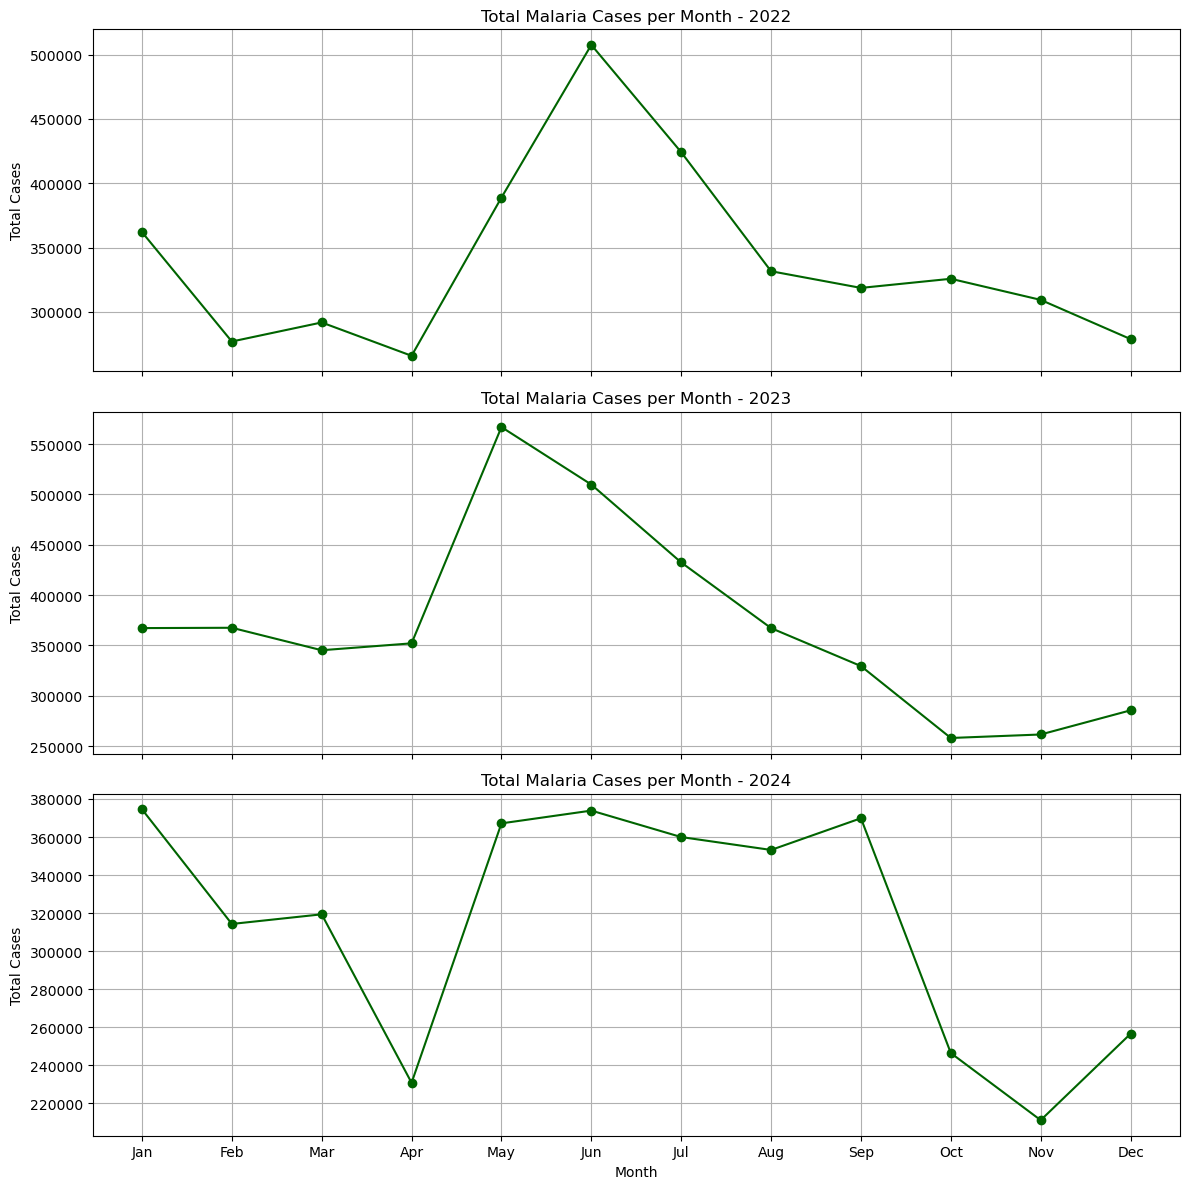

In [38]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

malaria['Month'] = pd.Categorical(malaria['Month'], categories=month_order, ordered=True)

monthly_cases = malaria.groupby(['Year', 'Month'])['Total Cases'].sum().reset_index()

monthly_cases.sort_values(by=['Year', 'Month'], inplace=True)

years = monthly_cases['Year'].unique()

# Plot: one chart per year
fig, axs = plt.subplots(len(years), 1, figsize=(12, 4 * len(years)), sharex=True)

for i, year in enumerate(years):
    data = monthly_cases[monthly_cases['Year'] == year]
    axs[i].plot(data['Month'], data['Total Cases'], marker='o', linestyle='-', color='darkgreen')
    axs[i].set_title(f'Total Malaria Cases per Month - {year}')
    axs[i].set_ylabel('Total Cases')
    axs[i].grid(True)

# Common x-axis label
axs[-1].set_xlabel('Month')

plt.tight_layout()
plt.show()


HEAT MAP

C:\Users\user\AppData\Local\Temp\ipykernel_15404\84192926.py:22: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = data_year.pivot_table(index='County', columns='Month', values='Total Cases', aggfunc='sum').fillna(0)
C:\Users\user\AppData\Local\Temp\ipykernel_15404\84192926.py:22: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = data_year.pivot_table(index='County', columns='Month', values='Total Cases', aggfunc='sum').fillna(0)
C:\Users\user\AppData\Local\Temp\ipykernel_15404\84192926.py:22: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence th

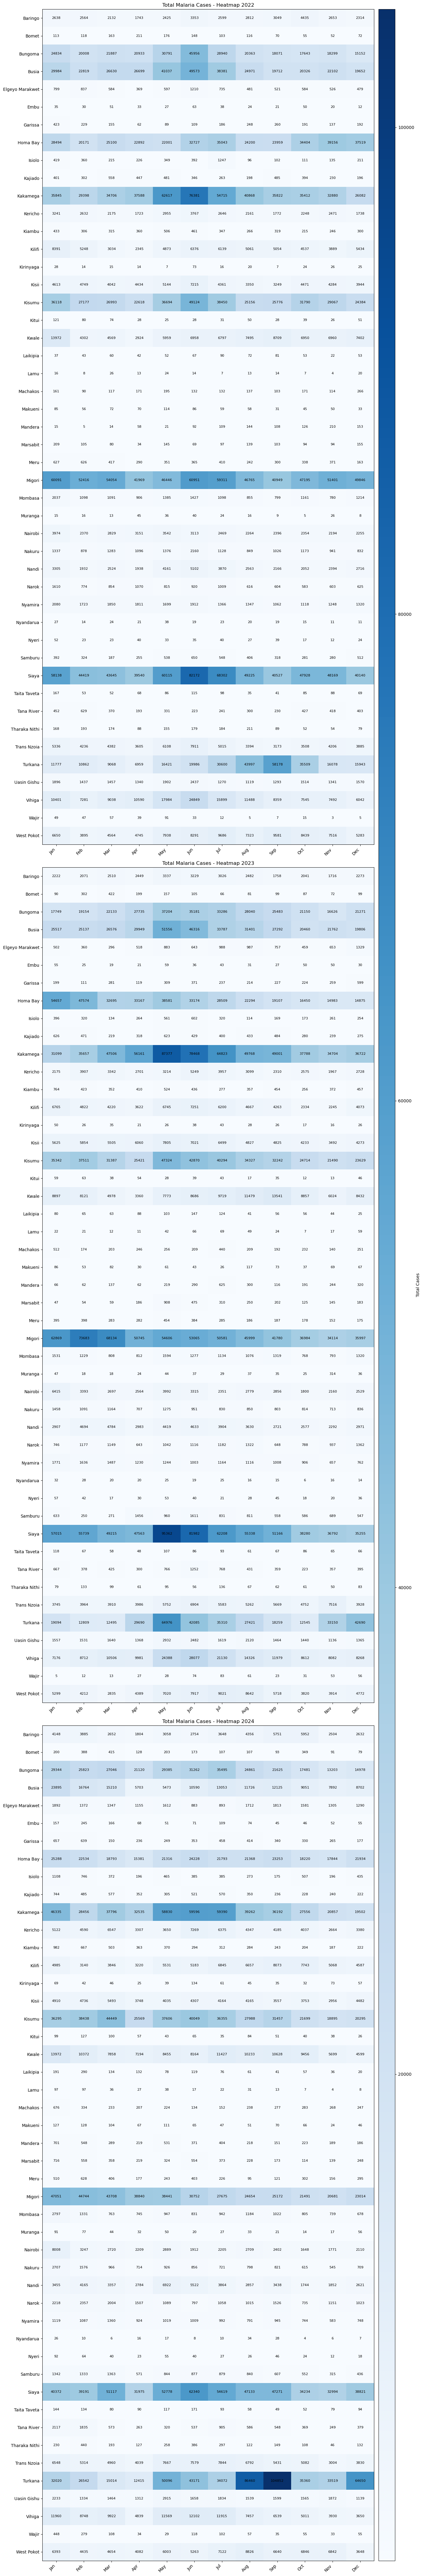

In [59]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
malaria['Month'] = pd.Categorical(malaria['Month'], categories=month_order, ordered=True)
malaria.sort_values(by=['County', 'Year', 'Month'], inplace=True)

years = sorted(malaria['Year'].unique())
counties = malaria['County'].unique()
county_count = len(counties)
row_height = 0.6

# Create a grid layout: rows for years, 2 columns (main + colorbar)
fig = plt.figure(figsize=(14, county_count * row_height * len(years)))
gs = gridspec.GridSpec(len(years), 2, width_ratios=[20, 1])  # last column for colorbar

vmin = malaria['Total Cases'].min()
vmax = malaria['Total Cases'].max()

last_im = None

for i, year in enumerate(years):
    data_year = malaria[malaria['Year'] == year]
    pivot = data_year.pivot_table(index='County', columns='Month', values='Total Cases', aggfunc='sum').fillna(0)

    ax = fig.add_subplot(gs[i, 0])
    im = ax.imshow(pivot, cmap='Blues', aspect='auto', vmin=vmin, vmax=vmax)
    last_im = im

    ax.set_xticks(np.arange(len(pivot.columns)))
    ax.set_yticks(np.arange(len(pivot.index)))
    ax.set_xticklabels(pivot.columns)
    ax.set_yticklabels(pivot.index)
    ax.set_title(f'Total Malaria Cases - Heatmap {year}')
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    for y in range(pivot.shape[0]):
        for x in range(pivot.shape[1]):
            val = int(pivot.iloc[y, x])
            ax.text(x, y, f'{val}', ha='center', va='center', color='black', fontsize=8)

# Add colorbar in the last column (independent cell)
cax = fig.add_subplot(gs[:, 1])  # spans all rows
fig.colorbar(last_im, cax=cax, label='Total Cases')

plt.tight_layout()
plt.show()